## MNIST CNN

In [255]:
%matplotlib inline
from fastai import *
from fastai.vision import *

In [256]:
path = untar_data(URLs.MNIST)

In [257]:
path.ls()

[WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/testing'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training')]

In [258]:
il = ImageItemList.from_folder(path, convert_mode='L')

In [259]:
il.items[0]

WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/testing/0/10.png')

In [260]:
defaults.cmap='binary'

In [261]:
il

ImageItemList (70000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: C:\Users\TC256760\.fastai\data\mnist_png

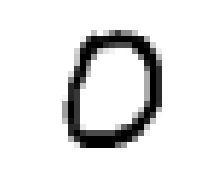

In [262]:
il[0].show()

In [263]:
sd = il.split_by_folder(train='training', valid='testing'); sd

ItemLists;

Train: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: C:\Users\TC256760\.fastai\data\mnist_png;

Valid: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: C:\Users\TC256760\.fastai\data\mnist_png;

Test: None

In [264]:
(path/'training').ls()

[WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/0'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/1'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/2'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/3'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/4'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/5'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/6'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/7'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/8'),
 WindowsPath('C:/Users/TC256760/.fastai/data/mnist_png/training/9')]

In [265]:
ll = sd.label_from_folder()

In [266]:
ll

LabelLists;

Train: LabelList
y: CategoryList (60000 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: C:\Users\TC256760\.fastai\data\mnist_png
x: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: C:\Users\TC256760\.fastai\data\mnist_png;

Valid: LabelList
y: CategoryList (10000 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: C:\Users\TC256760\.fastai\data\mnist_png
x: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: C:\Users\TC256760\.fastai\data\mnist_png;

Test: None

In [267]:
x,y = ll.train[0]

0 torch.Size([1, 28, 28])


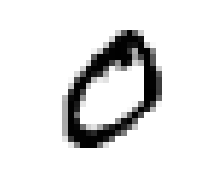

In [268]:
x.show()
print(y,x.shape)

In [269]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [270]:
ll = ll.transform(tfms)

In [272]:
bs = 4

In [274]:
data = ll.databunch(bs=bs).normalize()

In [275]:
x,y = data.train_ds[0]

0


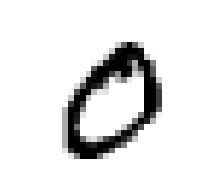

In [276]:
x.show()
print(y)

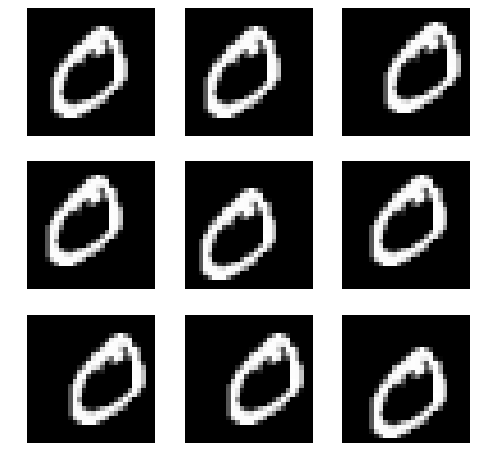

In [277]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [278]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([4, 1, 28, 28]), torch.Size([4]))

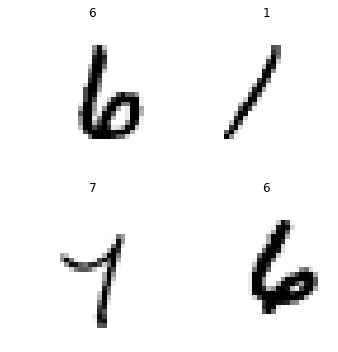

In [280]:
data.show_batch(rows=2, figsize=(5,5))

# Basic CNN

In [281]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [282]:
model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [283]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [284]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [4, 8, 14, 14]       80         True      
______________________________________________________________________
BatchNorm2d          [4, 8, 14, 14]       16         True      
______________________________________________________________________
ReLU                 [4, 8, 14, 14]       0          False     
______________________________________________________________________
Conv2d               [4, 16, 7, 7]        1168       True      
______________________________________________________________________
BatchNorm2d          [4, 16, 7, 7]        32         True      
______________________________________________________________________
ReLU                 [4, 16, 7, 7]        0          False     
______________________________________________________________________
Conv2d               [4, 32, 4, 4]        4640       True      
______________________________________________________________

In [285]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


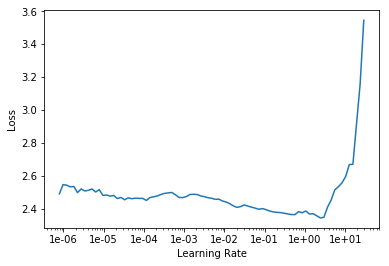

In [286]:
learn.recorder.plot()

In [287]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 